In [1]:
import numpy as np
import pylab as plt
import planet_search as ps

In [2]:
# just do it
tic = 98796344
ts = ps.run_full_planet_search(tic)

  0%|          | 0/2309 periods | 00:00<?

Running TLS for planet 1 (sector 4)
Transit Least Squares TLS 1.0.28 (13 June 2021)
Creating model cache for 38 durations
Searching 14707 data points, 2309 periods from 0.601 to 12.804 days
Using all 8 CPU threads


100%|██████████| 2309/2309 periods | 00:16<00:00
  0%|          | 0/6205 [00:00<?, ?it/s]

Searching for best T0 for period 1.56217 days


100%|██████████| 6205/6205 [00:02<00:00, 2930.88it/s]
  0%|          | 0/2309 periods | 00:00<?

Running TLS for planet 2 (sector 4)
Transit Least Squares TLS 1.0.28 (13 June 2021)
Creating model cache for 38 durations
Searching 14329 data points, 2309 periods from 0.601 to 12.804 days
Using all 8 CPU threads


100%|██████████| 2309/2309 periods | 00:21<00:00
  2%|▏         | 169/9068 [00:00<00:05, 1679.47it/s]

Searching for best T0 for period 5.35798 days


100%|██████████| 9068/9068 [00:02<00:00, 3376.88it/s]
  0%|          | 0/2309 periods | 00:00<?

Running TLS for planet 3 (sector 4)
Transit Least Squares TLS 1.0.28 (13 June 2021)
Creating model cache for 38 durations
Searching 14077 data points, 2309 periods from 0.601 to 12.804 days
Using all 8 CPU threads


100%|██████████| 2309/2309 periods | 00:19<00:00
  1%|          | 125/12135 [00:00<00:09, 1239.40it/s]

Searching for best T0 for period 0.66222 days


100%|██████████| 12135/12135 [00:04<00:00, 2518.00it/s]
  0%|          | 0/2290 periods | 00:00<?

Running TLS for planet 1 (sector 31)
Transit Least Squares TLS 1.0.28 (13 June 2021)
Creating model cache for 37 durations
Searching 16538 data points, 2290 periods from 0.601 to 12.714 days
Using all 8 CPU threads


100%|██████████| 2290/2290 periods | 00:23<00:00
  1%|▏         | 157/10952 [00:00<00:06, 1560.51it/s]

Searching for best T0 for period 5.35699 days


100%|██████████| 10952/10952 [00:03<00:00, 2956.47it/s]
  0%|          | 0/2290 periods | 00:00<?

Running TLS for planet 2 (sector 31)
Transit Least Squares TLS 1.0.28 (13 June 2021)
Creating model cache for 37 durations
Searching 16295 data points, 2290 periods from 0.601 to 12.714 days
Using all 8 CPU threads


100%|██████████| 2290/2290 periods | 00:20<00:00
  2%|▏         | 156/9052 [00:00<00:05, 1553.35it/s]

Searching for best T0 for period 2.93154 days


100%|██████████| 9052/9052 [00:02<00:00, 3341.33it/s]
  0%|          | 0/2290 periods | 00:00<?

Running TLS for planet 3 (sector 31)
Transit Least Squares TLS 1.0.28 (13 June 2021)
Creating model cache for 37 durations
Searching 15949 data points, 2290 periods from 0.601 to 12.714 days
Using all 8 CPU threads


100%|██████████| 2290/2290 periods | 00:18<00:00


In [123]:
# try getting periods recovered for a given lc
Pmax = np.arange(6,50)
N = 500
Ntransits_covered = np.zeros((np.unique(ts.lc.sectors).size,len(Pmax),N))

# for each maximum period 
for si,s in enumerate(np.unique(ts.lc.sectors)):
    g = ts.lc.sectors == s
    for i,p in enumerate(Pmax):
        # for random phases
        for j,t0 in enumerate(np.random.uniform(ts.lc.bjd[g].min(), ts.lc.bjd[g].min()+Pmax.max(), N)):
            # how many mid-transits are covered by the LC?
            Ntransits_covered[si,i,j] = np.sum(abs(rvs.foldAt(ts.lc.bjd[g], p, t0)) < .5*2/60/24/p)
            #for n in np.arange(-3,4):
            #    Ntransits_covered[si,i,j] += np.sum(abs(ts.lc.bjd[g]-(t0+n*p)) < 2/60/24)

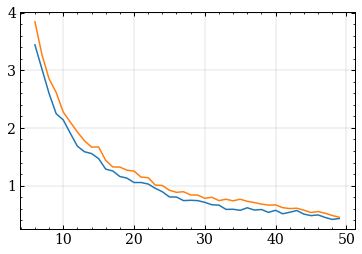

In [124]:
for s,_ in enumerate(np.unique(ts.lc.sectors)):
    plt.plot(Pmax, np.mean(Ntransits_covered[s],1), '-')
plt.grid(color='k', lw=.1)
plt.axhline(2, color='')

In [112]:
t0,p,np.sum(abs(rvs.foldAt(ts.lc.bjd[g], p, t0)) < 1/60/24/p)

(2.116396046600332, 26, 1)

In [113]:
np.sort(abs(rvs.foldAt(ts.lc.bjd[g], p, t0))), 1/60/24/p

(array([1.75168344e-05, 3.59015002e-05, 7.09351689e-05, ...,
        4.99927709e-01, 4.99965453e-01, 4.99981128e-01]),
 2.670940170940171e-05)

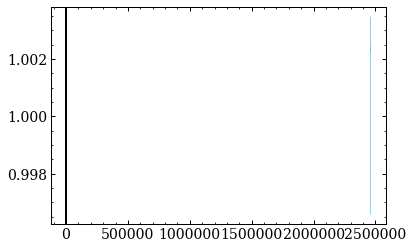

In [114]:
plt.plot(ts.lc.bjd[g], ts.lc.fdetrend[g], lw=.2)
for i in np.arange(-1,3):
    plt.axvline(t0+ts.lc.+i*p, color='k')